## Contraints ##
-np.pi < eef[0] < 0
eef[2] > 0
- 1.5 * np.pi < eef[3] < 0.2
- np.pi < eef[4] < 0

In [ ]:
from utils_ur5 import *

In [2]:
RS = RealSense()
CGN = ContactGraspNet(K=RS.K_rs)
UR5 = UR5Robot(RS)
GSAM = GroundedSAM()

/home/ur-plusle/Desktop/contact_graspnet/pointnet2/tf_ops/sampling
--- Get model
Instructions for updating:
Colocations handled automatically by placer.


Instructions for updating:
`NHWC` for data_format is deprecated, use `NWC` instead
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


2024-07-29 18:39:59.484996: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-07-29 18:39:59.485751: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2024-07-29 18:39:59.485833: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1733] Found device 0 with properties: 
pciBusID: 0000:01:00.0 name: NVIDIA GeForce RTX 4080 computeCapability: 8.9
coreClock: 2.595GHz coreCount: 76 deviceMemorySize: 15.70GiB deviceMemoryBandwidth: 667.63GiB/s
2024-07-29 18:39:59.485863: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1)

('loading ', '/home/ur-plusle/Desktop/contact_graspnet/checkpoints/scene_test_2048_bs3_hor_sigma_001/model.ckpt-54054')
INFO:tensorflow:Restoring parameters from /home/ur-plusle/Desktop/contact_graspnet/checkpoints/scene_test_2048_bs3_hor_sigma_001/model.ckpt-54054


2024-07-29 18:40:01.392768: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1258] Device interconnect StreamExecutor with strength 1 edge matrix:
2024-07-29 18:40:01.392787: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1264]      0 
2024-07-29 18:40:01.392797: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1277] 0:   N 
2024-07-29 18:40:01.392948: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2024-07-29 18:40:01.393029: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2024-07-29 18:40:01.393082: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2024-

Activation completed. Activation time :  1.0879456996917725
T_eef_to_rs: [[ 0.99878492  0.04703192 -0.01471985 -0.02140412]
 [-0.04732915  0.99866812 -0.02054116  0.05913408]
 [ 0.01373416  0.02121288  0.99968064  0.09495519]
 [ 0.          0.          0.          1.        ]]


final text_encoder_type: bert-base-uncased


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertModel: ['cls.predictions.bias', 'cls.predictions.transform.dense.bias', 'cls.seq_relationship.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.LayerNorm.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


Error: (inverse kinematics) failed to get ik solution


[ INFO] [1722246001.718896920]: Loading robot model 'ur5_robot'...
[ INFO] [1722246001.750997243]: IK Using joint shoulder_link -6.28319 6.28319
[ INFO] [1722246001.751005008]: IK Using joint upper_arm_link -6.28319 6.28319
[ INFO] [1722246001.751008580]: IK Using joint forearm_link -3.14159 3.14159
[ INFO] [1722246001.751011814]: IK Using joint wrist_1_link -6.28319 6.28319
[ INFO] [1722246001.751014728]: IK Using joint wrist_2_link -6.28319 6.28319
[ INFO] [1722246001.751017567]: IK Using joint wrist_3_link -6.28319 6.28319
[ INFO] [1722246001.751021918]: Looking in common namespaces for param name: manipulator/position_only_ik
[ INFO] [1722246001.751438413]: Looking in common namespaces for param name: manipulator/solve_type
[ INFO] [1722246001.751823128]: Using solve type Distance
[ INFO] [1722246002.872233265]: Ready to take commands for planning group manipulator.
Before NMS: 3 boxes
After NMS: 3 boxes


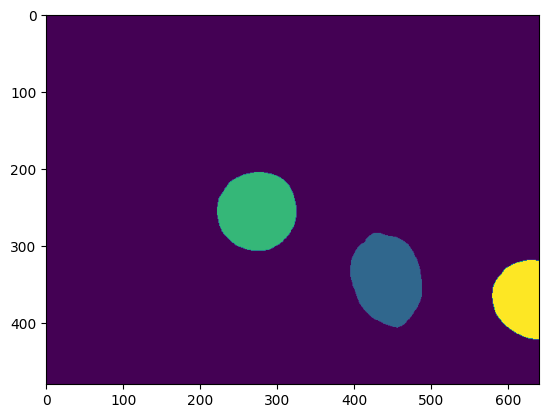

In [3]:
rospy.sleep(1.0)
rgb, depth = UR5.get_view(UR5.ROBOT_INIT_POS, UR5.ROBOT_INIT_QUAT, show_img=True)
#rgb, depth = RS.get_frames()
INIT_JOINTS = UR5.get_joint_states()
INIT_EEF_P = UR5.get_eef_pose()

classes = ["Orange", "Apple", "Lemon"]
detections = GSAM.get_masks(rgb, classes)
#print(detections.class_id)

segmap = np.zeros(depth.shape)
for i, m in enumerate(detections.mask):
    segmap[m] = i+1
plt.imshow(segmap)
plt.show()


In [4]:
segmap_id = 1
grasps, scores = CGN.get_grasps(rgb, depth, segmap, segmap_id, num_K=1, show_result=False)

Converting depth to point cloud(s)...
Generating Grasps...


2024-07-29 18:40:14.302984: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudnn.so.8
2024-07-29 18:40:14.571019: I tensorflow/stream_executor/cuda/cuda_dnn.cc:359] Loaded cuDNN version 8801
2024-07-29 18:40:14.612933: W tensorflow/stream_executor/gpu/asm_compiler.cc:191] Falling back to the CUDA driver for PTX compilation; ptxas does not support CC 8.9
2024-07-29 18:40:14.612949: W tensorflow/stream_executor/gpu/asm_compiler.cc:194] Used ptxas at ptxas
2024-07-29 18:40:14.612986: W tensorflow/stream_executor/gpu/redzone_allocator.cc:314] Unimplemented: ptxas ptxas too old. Falling back to the driver to compile.
Relying on driver to perform ptx compilation. 
Modify $PATH to customize ptxas location.
This message will be only logged once.
2024-07-29 18:40:14.631217: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcublas.so.11
2024-07-29 18:40:14.631998: I tensorflow/stream_exec

Generated 51 grasps
# grasps: 8


In [5]:
grasps

(array([[ 0.9959283 ,  0.03244205, -0.08410802,  0.10131984],
        [-0.0046641 ,  0.9502941 ,  0.31131858,  0.0521605 ],
        [ 0.09002715, -0.30965868,  0.94657624,  0.35016364],
        [ 0.        ,  0.        ,  0.        ,  1.        ]],
       dtype=float32),)

In [6]:
INIT_EEF_P

([3.2139032558885802e-06, -0.40003028424482623, 0.5999756820187643],
 [0.9999998049597082,
  -0.00031849335787819376,
  0.00046294021131097264,
  0.0002726332467511948])

In [8]:
pos, quat = UR5.get_goal_from_grasp(grasps[0], INIT_EEF_P)

goal P: [[ 0.99330305  0.08077954 -0.08260457  0.07744565]
 [ 0.05295468 -0.95374777 -0.29590703 -0.49956045]
 [-0.10268715  0.28955104 -0.95163839  0.15259637]
 [ 0.          0.          0.          1.        ]]


In [10]:
goal_pos[2] = np.clip(goal_pos[2], 0.22, 0.7)
goal_P = form_T(quat2mat(quat), goal_pos)
joints = UR5.solve_ik(goal_P)
print(joints)

Find solutions: [-1.62347734 -1.40870547  2.06296539 -2.5302937  -1.6377548   3.01003075]
[-1.62347734 -1.40870547  2.06296539 -2.5302937  -1.6377548   3.01003075]


In [12]:
n_obj = 2
for segmap_id in range(1, n_obj+1):
    grasps, scores = CGN.get_grasps(rgb, depth, segmap, segmap_id, num_K=1, show_result=False)
    #grasps, scores = CGN.get_4dof_grasps(rgb, depth, segmap, segmap_id, num_K=1, show_result=True)
    print(grasps)
    grasp = grasps[0]
    grasp_4dof = project_grasp_4dof(grasp)

    check_go()
    UR5.get_view(UR5.PRE_PLACE_POS, [1,0,0,0])
    check_go()
    pick_pos, pick_quat = UR5.get_goal_from_grasp(grasp, INIT_EEF_P)
    pick_4dof_pos, pick_4dof_quat = UR5.get_goal_from_grasp(grasp_4dof, INIT_EEF_P)
    #UR5.get_view(pick_pos + np.array([0, 0, 0.1]), pick_4dof_quat)
    #check_go()
    UR5.get_view(pick_pos + np.array([0, 0, 0.1]), pick_quat)
    check_go()
    UR5.get_view(pick_pos + np.array([0, 0, 0.05]), pick_quat)
    check_go()
    UR5.get_view(grasp=1.0)
    check_go()
    UR5.get_view(pick_pos + np.array([0, 0, 0.1]), pick_quat, grasp=1.0)
    check_go()
    #UR5.get_view(pick_pos + np.array([0, 0, 0.1]), pick_4dof_quat, grasp=1.0)
    #check_go()
    UR5.get_view(pick_pos + np.array([0, 0, 0.2]), UR5.ROBOT_INIT_QUAT, grasp=1.0)
    check_go()
    UR5.move_to_joints(INIT_JOINTS)
    check_go()
    UR5.get_view(UR5.ROBOT_INIT_POS, UR5.ROBOT_INIT_QUAT, grasp=0.0)
    break


Converting depth to point cloud(s)...
Generating Grasps...
Generated 74 grasps
# grasps: 9
(array([[-0.98176295,  0.12148821,  0.146226  ,  0.06888197],
       [-0.06072873, -0.9292841 ,  0.36433917,  0.02610746],
       [ 0.18014841,  0.34881458,  0.91971457,  0.35798395],
       [ 0.        ,  0.        ,  0.        ,  1.        ]],
      dtype=float32),)


go? y


y


Error: (inverse kinematics) failed to get ik solution


go? y


y
goal P: [[-0.98591292  0.07340575  0.15029046  0.04372879]
 [ 0.01841996  0.94073456 -0.33864326 -0.47489897]
 [-0.16624178 -0.33110442 -0.92883455  0.14573205]
 [ 0.          0.          0.          1.        ]]
goal P: [[-0.99978731  0.01533969 -0.01378134  0.04372879]
 [ 0.01506238  0.99968642  0.02000514 -0.47489897]
 [ 0.01408389  0.0197933  -0.99970496  0.14573205]
 [ 0.          0.          0.          1.        ]]
Find solutions: [-1.7468034  -1.52177548  2.12086177 -2.48919344 -1.36201799 -0.09464404]
[ 0.04372879 -0.47489897  0.24573205]
[ 0.02338272  0.98176907 -0.17054613  0.08060252]


go? y


y
Find solutions: [-1.7468034  -1.47901428  2.15572309 -2.56681585 -1.36201799 -0.09464404]
[ 0.04372879 -0.47489897  0.22      ]
[ 0.02338272  0.98176907 -0.17054613  0.08060252]


go? 



exit.


NameError: name 'exit' is not defined

In [1]:
import numpy as np
from matplotlib import pyplot as plt
from utils_sim2real import inverse_projection
from utils_mcts import Renderer
from environment import RealEnvironment

2024-07-29 20:31:34.056892: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0
2024-07-29 20:31:34.509561: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcuda.so.1
2024-07-29 20:31:34.535892: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2024-07-29 20:31:34.535958: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1733] Found device 0 with properties: 
pciBusID: 0000:01:00.0 name: NVIDIA GeForce RTX 4080 computeCapability: 8.9
coreClock: 2.595GHz coreCount: 76 deviceMemorySize: 15.70GiB deviceMemoryBandwidth: 667.63GiB/s
2024-07-29 20:31:34.535970: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0
2024-07-29 20:31:34.537093: I tensorflow/stream_executor/

Failed to import pyassimp, see https://github.com/moveit/moveit/issues/86 for more info


In [2]:
env = RealEnvironment(None)
renderer = Renderer(tableSize=(12, 15), imageSize=(360, 480), cropSize=(128, 128))

/home/ur-plusle/Desktop/contact_graspnet/pointnet2/tf_ops/sampling
--- Get model
Instructions for updating:
Colocations handled automatically by placer.


Instructions for updating:
`NHWC` for data_format is deprecated, use `NWC` instead
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


2024-07-29 20:31:39.125232: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-07-29 20:31:39.126023: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2024-07-29 20:31:39.126102: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1733] Found device 0 with properties: 
pciBusID: 0000:01:00.0 name: NVIDIA GeForce RTX 4080 computeCapability: 8.9
coreClock: 2.595GHz coreCount: 76 deviceMemorySize: 15.70GiB deviceMemoryBandwidth: 667.63GiB/s
2024-07-29 20:31:39.126130: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1)

('loading ', '/home/ur-plusle/Desktop/contact_graspnet/checkpoints/scene_test_2048_bs3_hor_sigma_001/model.ckpt-54054')
INFO:tensorflow:Restoring parameters from /home/ur-plusle/Desktop/contact_graspnet/checkpoints/scene_test_2048_bs3_hor_sigma_001/model.ckpt-54054


2024-07-29 20:31:41.066028: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1258] Device interconnect StreamExecutor with strength 1 edge matrix:
2024-07-29 20:31:41.066049: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1264]      0 
2024-07-29 20:31:41.066055: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1277] 0:   N 
2024-07-29 20:31:41.066215: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2024-07-29 20:31:41.066296: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2024-07-29 20:31:41.066348: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2024-

Activation completed. Activation time :  1.1200783252716064
T_eef_to_rs: [[-0.99945108 -0.03020804 -0.01360183  0.04058923]
 [ 0.03033808 -0.99949495 -0.00945742  0.05062589]
 [-0.01330927 -0.00986488  0.99986276  0.08589446]
 [ 0.          0.          0.          1.        ]]


final text_encoder_type: bert-base-uncased


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertModel: ['cls.predictions.transform.LayerNorm.bias', 'cls.predictions.bias', 'cls.seq_relationship.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


Add bias: [0, 0, 0]


Error: (inverse kinematics) failed to get ik solution


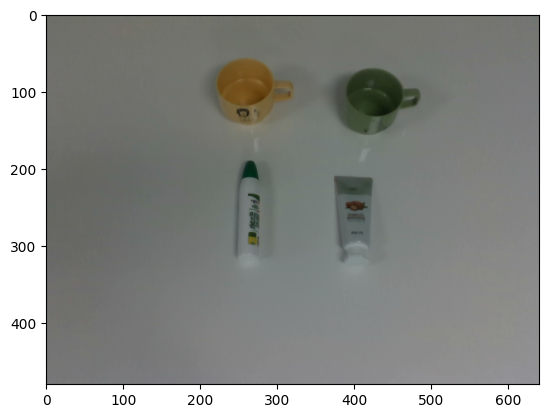

In [3]:
rgb, depth = env.UR5.get_view(env.UR5.ROBOT_INIT_POS, env.UR5.ROBOT_INIT_QUAT, show_img=True)
plt.imshow(rgb)

In [4]:
classes = ["Apple. Lemon. Orange. Fruit. Basket. Scissors."]
classes = "Apple. Lemon. Orange. Fruit. Basket. Scissors.".replace(' ', '').split('.')

classes = "Glass.Cup.Bowl.Basket.Plate.Teapot.Shampoo.Clock.Soup case.Toothpaste.Tube.".split(".")
obs = env.reset(classes)
initRgb = obs['rgb']
initSeg = obs['segmentation']
renderer.setup(initRgb, initSeg)

Error: (inverse kinematics) failed to get ik solution


[ INFO] [1722252701.384316820]: Loading robot model 'ur5_robot'...
[ INFO] [1722252701.430798689]: IK Using joint shoulder_link -6.28319 6.28319
[ INFO] [1722252701.430811013]: IK Using joint upper_arm_link -6.28319 6.28319
[ INFO] [1722252701.430817278]: IK Using joint forearm_link -3.14159 3.14159
[ INFO] [1722252701.430822506]: IK Using joint wrist_1_link -6.28319 6.28319
[ INFO] [1722252701.430828456]: IK Using joint wrist_2_link -6.28319 6.28319
[ INFO] [1722252701.430833602]: IK Using joint wrist_3_link -6.28319 6.28319
[ INFO] [1722252701.430840983]: Looking in common namespaces for param name: manipulator/position_only_ik
[ INFO] [1722252701.431261828]: Looking in common namespaces for param name: manipulator/solve_type
[ INFO] [1722252701.431897573]: Using solve type Distance
[ INFO] [1722252702.543335548]: Ready to take commands for planning group manipulator.
Before NMS: 10 boxes
After NMS: 6 boxes


Ellipse phi: 1.2480081235815277
Modifed phi: 71.50559827926281
Rectangle phi: -0.0
Ellipse phi: 1.633625502728621
Modifed phi: 93.59984661128735
Rectangle phi: -36.38434982299805
Ellipse phi: -0.054792873140462446
Modifed phi: -3.139400378344227
Ellipse phi: 1.0873376992573647
Modifed phi: 62.29986107291218
Ellipse phi: 0.02047918170625887
Modifed phi: 1.1733706796501573
Ellipse phi: 2.0087124498827253
Modifed phi: 115.09074563366406
Rectangle phi: 0.0


[array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 5., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]]),
 array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0

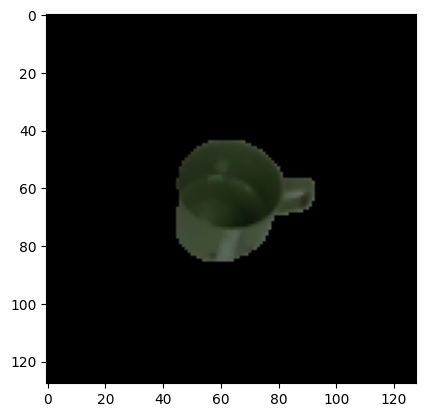

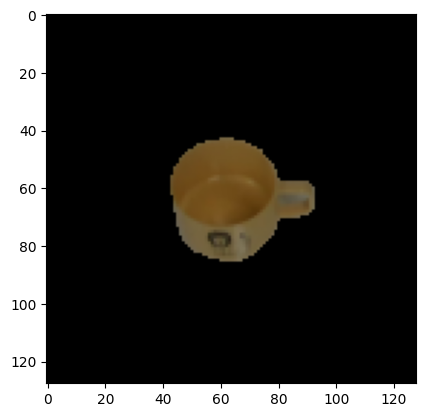

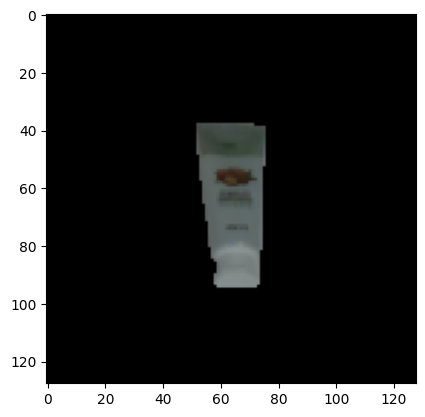

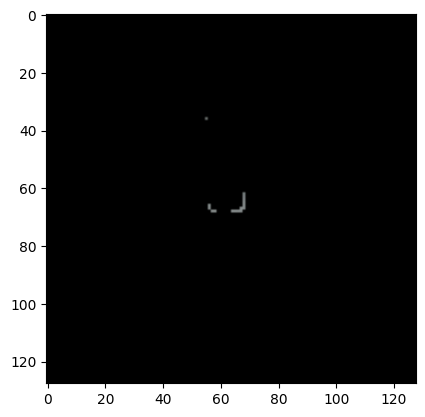

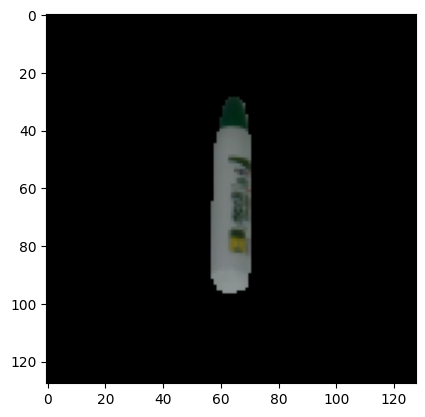

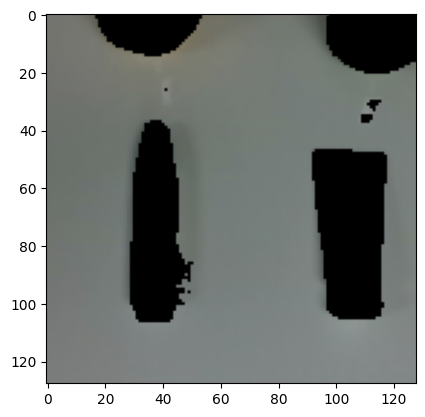

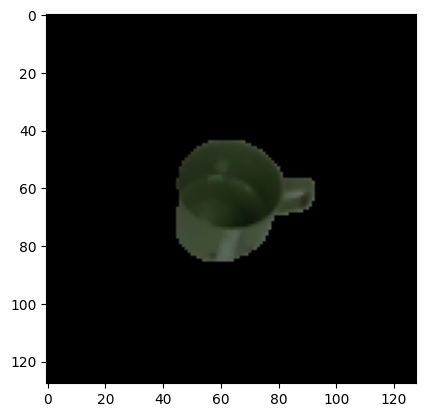

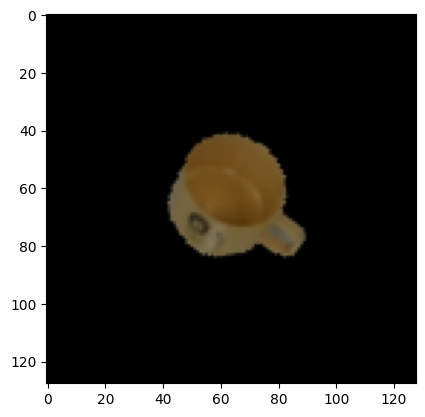

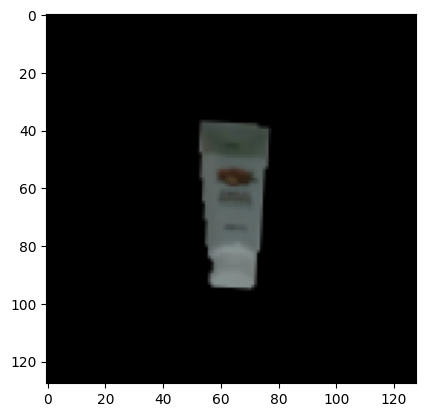

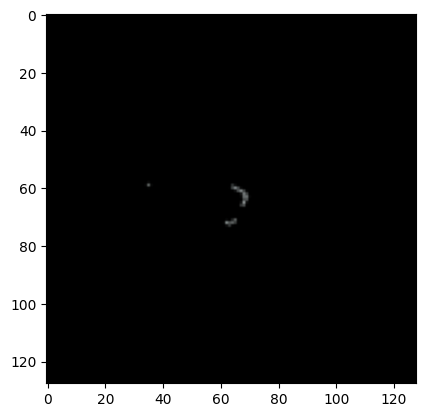

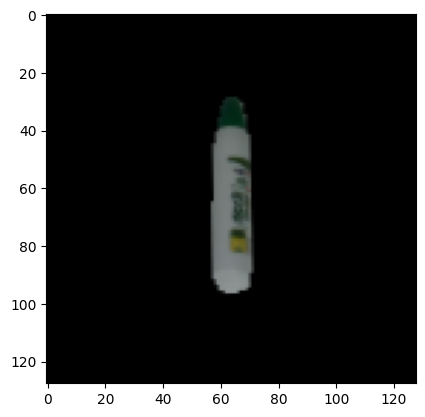

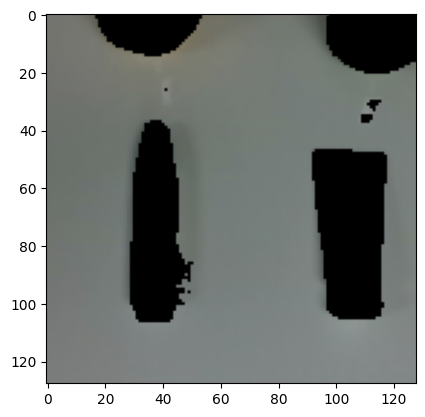

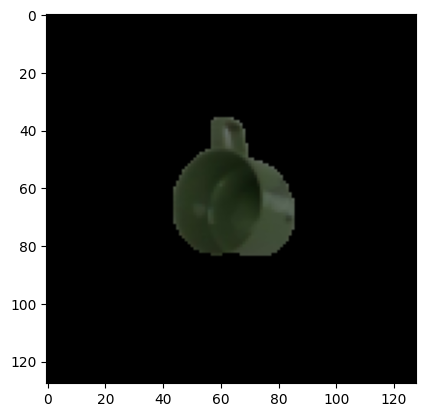

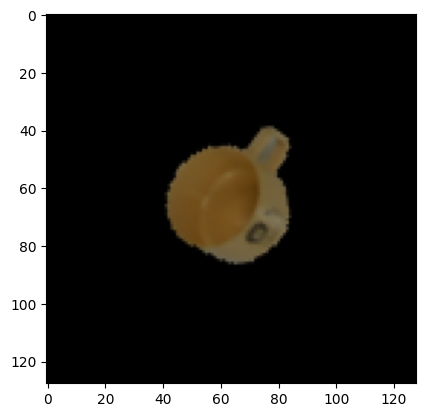

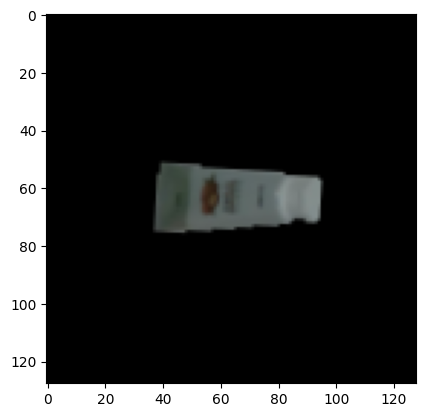

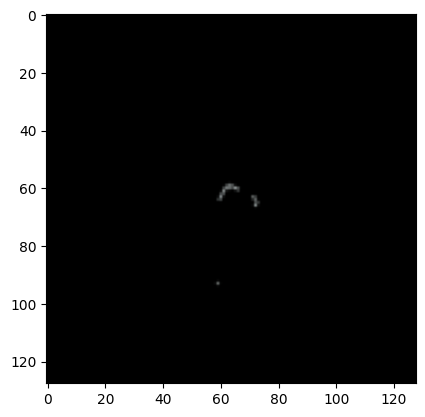

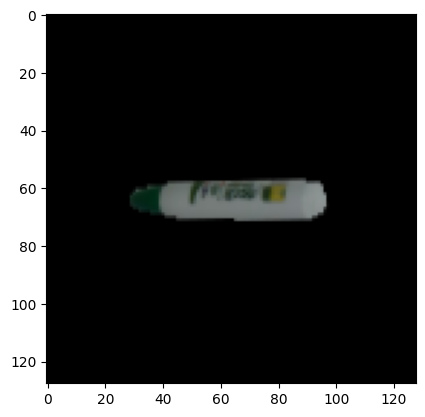

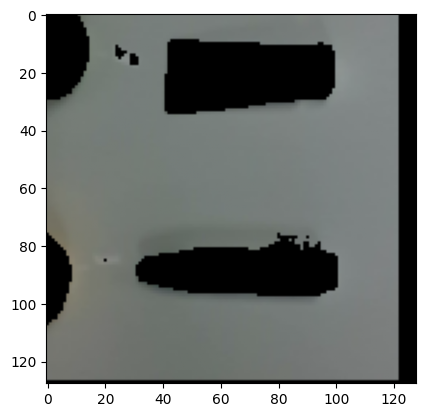

In [5]:
for x in renderer.objectPatches:
    for y in x:
        plt.imshow(y/255.)
        plt.show()

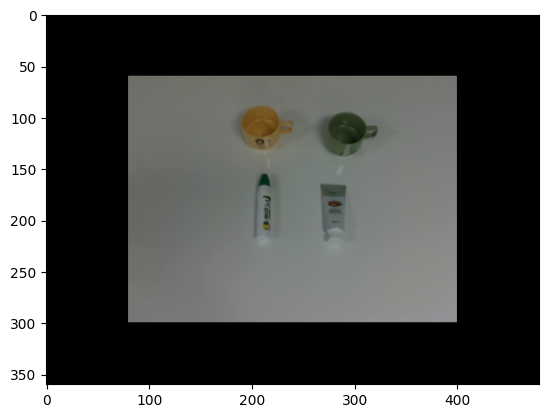

In [6]:
plt.imshow(initRgb)

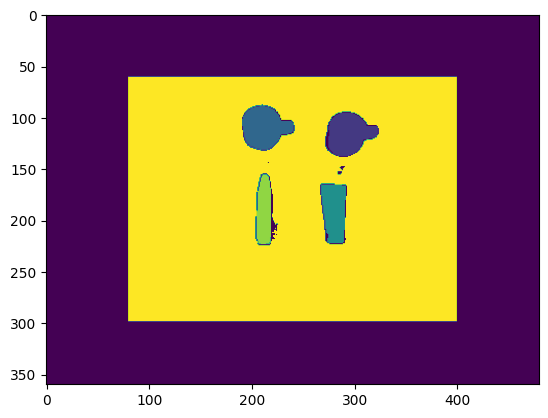

In [7]:
plt.imshow(env.current_obs['segmentation'])

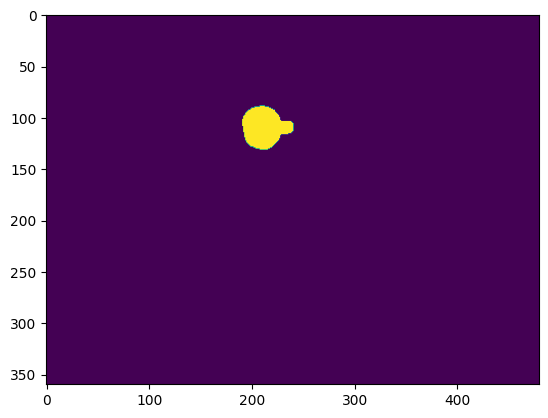

In [40]:
plt.imshow(env.current_obs['segmentation']==2)

In [ ]:
env.check_picknplace(2, stop=False)

Converting depth to point cloud(s)...
Generating Grasps...
Generated 5 grasps
# grasps: 3
goal P: [[ 0.39131922 -0.91998136  0.02244167  0.09196764]
 [-0.90905596 -0.39023506 -0.14606375 -0.65543524]
 [ 0.14313348  0.03675683 -0.98902096  0.28743808]
 [ 0.          0.          0.          1.        ]]
goal P: [[ 0.39131922 -0.91998136  0.02244167  0.09308972]
 [-0.90905596 -0.39023506 -0.14606375 -0.66273842]
 [ 0.14313348  0.03675683 -0.98902096  0.23798703]
 [ 0.          0.          0.          1.        ]]
Find solutions: [-1.60043716 -1.14906108  1.4649229  -2.03256178 -1.54403245  4.28088409]
[ 0.09196764 -0.65543524  0.28743808]
[ 0.83225218 -0.54942389  0.04973705  0.0549174 ]
Find solutions: [-1.59837186 -1.09047246  1.51188779 -2.13816977 -1.54433286  4.28292805]
[ 0.09308972 -0.66273842  0.23798703]
[ 0.83225218 -0.54942389  0.04973705  0.0549174 ]
Find solutions: [-1.60043716 -1.14906108  1.4649229  -2.03256178 -1.54403245  4.28088409]
[ 0.09196764 -0.65543524  0.28743808]


Error: (inverse kinematics) failed to get ik solution


Find solutions: [-1.59837186 -1.09047246  1.51188779 -2.13816977 -1.54433286  4.28292805]
[ 0.09308972 -0.66273842  0.23798703]
[ 0.83225218 -0.54942389  0.04973705  0.0549174 ]
Find solutions: [-1.59837186 -1.09047246  1.51188779 -2.13816977 -1.54433286  4.28292805]
[ 0.09308972 -0.66273842  0.23798703]
[ 0.83225218 -0.54942389  0.04973705  0.0549174 ]
Find solutions: [-1.60043716 -1.14906108  1.4649229  -2.03256178 -1.54403245  4.28088409]
[ 0.09196764 -0.65543524  0.28743808]
[ 0.83225218 -0.54942389  0.04973705  0.0549174 ]


In [ ]:
# n_obj = len(renderer.objectPatches)
for o in range(n_obj):
    env.check_picknplace(o+1, stop=False)

In [21]:
action = renderer.convert_action([1, 8, 11, 1])
print(action)

(1, [576, 388], -0.3805063978590416)


In [34]:
classes

['Apple. Lemon. Orange. Fruit. Basket. Scissors.']

In [70]:
classes = ['Apple', 'Ball', 'Lemon', 'Scissors']

In [63]:
classes = ['Apple. Ball. Lemon. Scissors.']

In [14]:
detections = env.GSAM.get_masks(rgb, classes)

Before NMS: 10 boxes
After NMS: 7 boxes


In [15]:
detections.class_id

array([1, 1, 9, 6, 6, 8, 8])

In [20]:
classes

['Glass',
 'Cup',
 'Bowl',
 'Basket',
 'Plate',
 'Teapot',
 'Shampoo',
 'Clock',
 'Soup case',
 'Toothpaste',
 'Tube',
 '']

In [17]:
np.array(classes)[detections.class_id]

array(['Cup', 'Cup', 'Toothpaste', 'Shampoo', 'Shampoo', 'Soup case',
       'Soup case'], dtype='<U10')

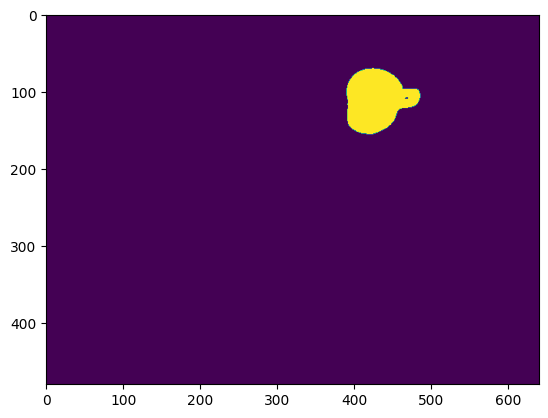

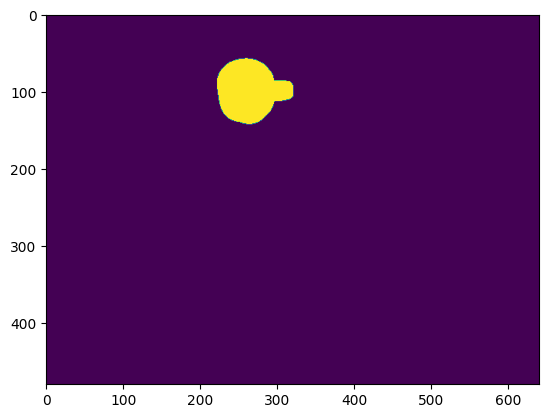

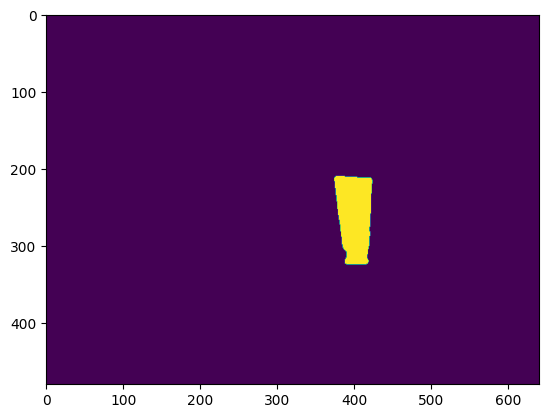

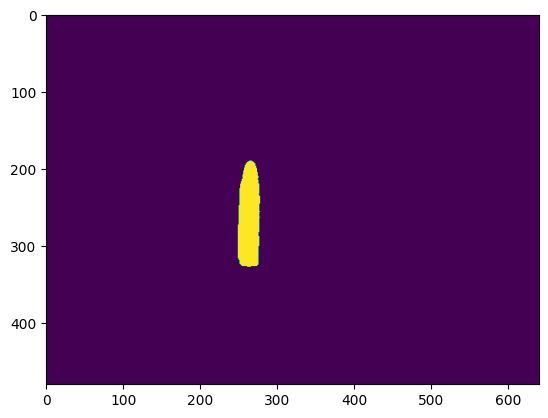

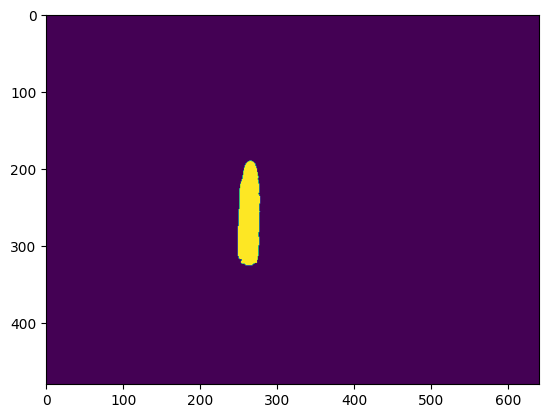

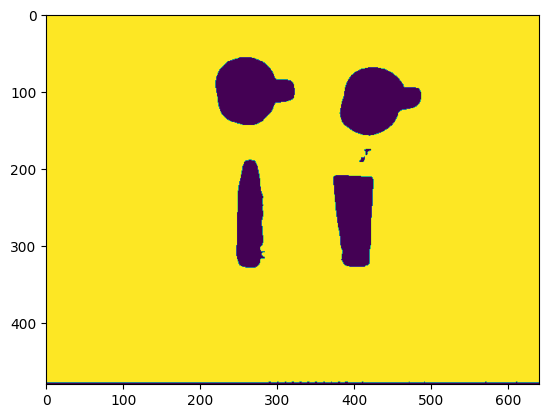

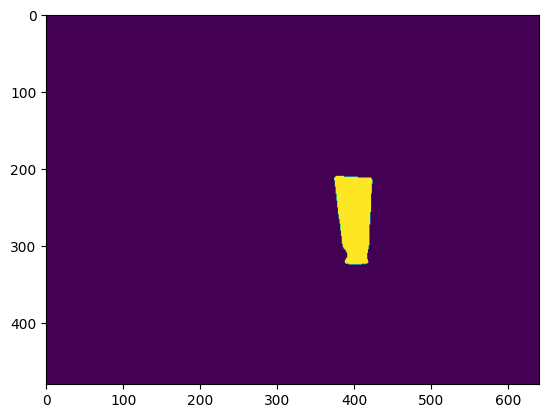

In [19]:
for m in detections.mask:
    plt.imshow(m)
    plt.show()

In [28]:
dir(detections)

['__annotations__',
 '__class__',
 '__dataclass_fields__',
 '__dataclass_params__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__len__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__post_init__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setitem__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 'area',
 'box_area',
 'class_id',
 'confidence',
 'data',
 'empty',
 'from_azure_analyze_image',
 'from_deepsparse',
 'from_detectron2',
 'from_inference',
 'from_lmm',
 'from_mmdetection',
 'from_paddledet',
 'from_roboflow',
 'from_sam',
 'from_tensorflow',
 'from_transformers',
 'from_ultralytics',
 'from_yolo_nas',
 'from_yolov5',
 'get_anchors_coordinates',
 'is_empty',
 'mask',
 'merge',
 'tracker_id',
 'with_nmm',
 'with_nms',
 'xyxy']

In [22]:
obj, pose, angle = action
env.step(obj, pose, angle) 

go? y


y
Converting depth to point cloud(s)...
Generating Grasps...
Generated 2 grasps
# grasps: 1
goal P: [[-0.9977894   0.06286102  0.02155637 -0.15872942]
 [ 0.06143557  0.99622053 -0.06140564 -0.4410129 ]
 [-0.02533493 -0.05994556 -0.99788032  0.2563659 ]
 [ 0.          0.          0.          1.        ]]
goal P: [[-0.9977894   0.06286102  0.02155637 -0.1576516 ]
 [ 0.06143557  0.99622053 -0.06140564 -0.44408318]
 [-0.02533493 -0.05994556 -0.99788032  0.20647188]
 [ 0.          0.          0.          1.        ]]


go? y


y
Find solutions: [-2.16072583 -1.55171955  2.02642989 -2.0846045  -1.51869977 -0.52665627]
[-0.15872942 -0.4410129   0.2563659 ]
[ 0.03110569  0.99898573 -0.03036859  0.01173472]


go? y


y
Find solutions: [-2.15498877 -1.49722707  2.07615876 -2.18912411 -1.51892483 -0.52091587]
[-0.1576516  -0.44408318  0.22      ]
[ 0.03110569  0.99898573 -0.03036859  0.01173472]


go? y


y


go? y


y
Find solutions: [-2.16072583 -1.55171955  2.02642989 -2.0846045  -1.51869977 -0.52665627]
[-0.15872942 -0.4410129   0.2563659 ]
[ 0.03110569  0.99898573 -0.03036859  0.01173472]


go? y


y


Error: (inverse kinematics) failed to get ik solution


goal P: [[-0.95111407 -0.29280723 -0.09821374 -0.20925928]
 [-0.28687392  0.95539204 -0.07021284 -0.39075608]
 [ 0.11439145 -0.03860548 -0.99268559  0.26988773]
 [ 0.          0.          0.          1.        ]]
goal P: [[-0.95111407 -0.29280723 -0.09821374 -0.21416997]
 [-0.28687392  0.95539204 -0.07021284 -0.39426672]
 [ 0.11439145 -0.03860548 -0.99268559  0.22025345]
 [ 0.          0.          0.          1.        ]]


go? y


y
Find solutions: [-2.30633783 -1.63108373  2.08776116 -2.14574909 -1.59650946 -1.03223598]
[-0.20925928 -0.39075608  0.26988773]
[ 0.14678169 -0.9873185   0.027554    0.05383399]


go? y


y
Find solutions: [-2.30935407 -1.54840326  2.15396094 -2.29470611 -1.59615338 -1.03523231]
[-0.21416997 -0.39426672  0.22025345]
[ 0.14678169 -0.9873185   0.027554    0.05383399]


go? y


y


go? y


y
Find solutions: [-2.30633783 -1.63108373  2.08776116 -2.14574909 -1.59650946 -1.03223598]
[-0.20925928 -0.39075608  0.26988773]
[ 0.14678169 -0.9873185   0.027554    0.05383399]


go? y


y


Error: (inverse kinematics) failed to get ik solution


Before NMS: 3 boxes
After NMS: 3 boxes


{'rgb_raw': array([[[ 96,  88,  85],
         [ 97,  89,  86],
         [ 97,  89,  86],
         ...,
         [124, 121, 116],
         [120, 120, 116],
         [119, 119, 115]],
 
        [[ 96,  88,  85],
         [ 97,  89,  86],
         [ 97,  89,  86],
         ...,
         [120, 120, 114],
         [119, 120, 114],
         [118, 119, 113]],
 
        [[ 96,  88,  85],
         [ 96,  88,  85],
         [ 97,  89,  86],
         ...,
         [120, 120, 114],
         [119, 120, 114],
         [118, 119, 113]],
 
        ...,
 
        [[124, 123, 125],
         [124, 123, 125],
         [123, 122, 124],
         ...,
         [151, 149, 156],
         [150, 148, 155],
         [151, 149, 156]],
 
        [[123, 123, 125],
         [123, 123, 125],
         [123, 123, 125],
         ...,
         [151, 149, 156],
         [150, 148, 155],
         [151, 149, 156]],
 
        [[123, 123, 125],
         [123, 123, 125],
         [122, 122, 124],
         ...,
         [151, 14

In [12]:
from transform_utils import euler2quat

In [9]:
renderer.ratio

array([30., 32.])

0 0 0.5609279318563563
0 1 0.45242023731403347
0 2 0.4740542561808384
0 3 0.43156006192210794
0 4 0.39592123243336186
0 5 0.36825872376252566
0 6 0.34608852712584776
0 7 0.3401445043301086
0 8 0.29932326001641557
0 9 0.3614181690884202
0 10 0.3855441627171548
0 11 0.3723017186721898
0 12 None
0 13 None
0 14 None
1 0 0.5540942899234432
1 1 0.49499613282236743
1 2 0.4542648256512652
1 3 0.40410840379892793
1 4 0.36033454605297677
1 5 0.322391746665277
1 6 0.3012951870132001
1 7 0.29212240252467986
1 8 0.29888632523609415
1 9 0.31851623638450327
1 10 0.35170315574303496
1 11 0.391182092464924
1 12 None
1 13 None
1 14 None
2 0 0.3970265641722498
2 1 0.3496767593319371
2 2 0.3110068429076261
2 3 0.26882787513132506
2 4 0.23294861169539352
2 5 0.2014860264533779
2 6 0.17719635247867732
2 7 0.16946033780235886
2 8 0.17588327616188784
2 9 0.1993488904597696
2 10 0.2288013050712263
2 11 0.2635043474686208
2 12 None
2 13 None
2 14 None
3 0 0.3928709556208575
3 1 0.3427709720401585
3 2 0.29754744

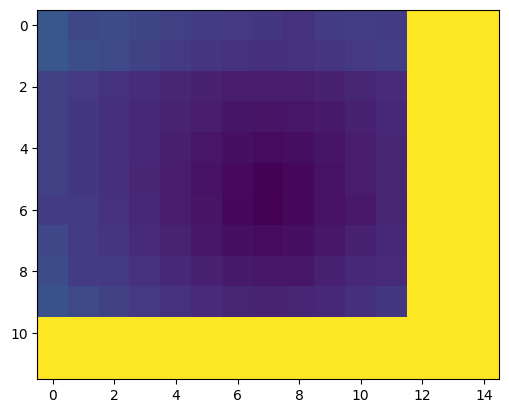

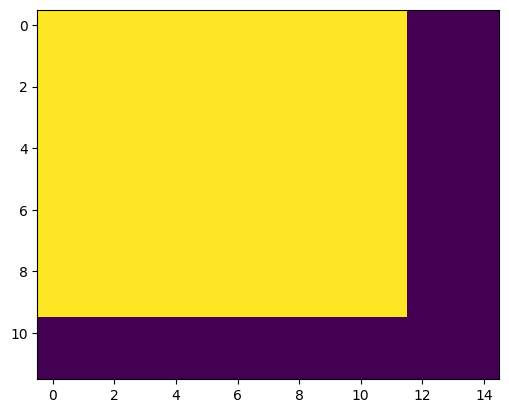

In [19]:
distmap = np.zeros([12, 15])
feasiblemap = np.zeros([12, 15])
depth = obs['depth_raw']
for y in range(12):
    for x in range(15):
        _, target_position, _ = renderer.convert_action([1, y, x, 0])
        try:
            target_pose = inverse_projection(depth, np.array(target_position), env.RS.K_rs, env.RS.D_rs)
            d = np.sqrt(target_pose[0]**2 + target_pose[1]**2)
            print(y, x, d)
        except:
            print(y, x, None)
            d = 2
        distmap[y, x] = d
        feasiblemap[y, x] = (d<0.8)
plt.imshow(distmap)
plt.show()
plt.imshow(feasiblemap)
plt.show()

In [5]:
renderer.convert_action([1, 0, 0, 0])

(1, [-128, -92], 0.0)

In [13]:
depth = obs['depth_raw']
target_position = [320, 268]
target_pose = inverse_projection(depth, np.array(target_position), env.RS.K_rs, env.RS.D_rs)

In [14]:
target_pose

array([-0.00179624,  0.02014777,  0.516     ])